<h2 style="text-align: center;">Hello! Welcome to my notebook💗💗💗

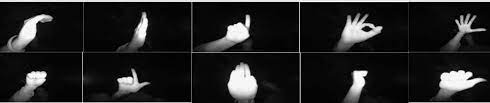

### 📍📍 About the Data

Hand gesture recognition database is presented, composed by a set of near infrared images acquired by the Leap Motion sensor.

The database is composed by 5 different hand-gestures (showed above) that were performed by 10 different subjects (5 men and 5 women).
<br>

The database is structured in different folders as:
<br>
/00 (subject with identifier 00)<br>
/01_palm (images for palm gesture of subject 00 )<br>
/01_palm/frame_197957_r.png,…,frame_198136_l.png, … (images that corresponds to different samples obtained for the palm gesture performed by the subject with identifier 00)<br>
/02_l (images for l gesture of subject 00 )<br>
'03_fist'<br>
'04_fist_moved'<br>
'05_thumb'<br>
/01<br>
/02<br>
/09 (last subject with identifier 09)

# 📌Importing Libaraies 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.math import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
tf.random.set_seed(3)
import glob 
import skimage as oi
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LeakyReLU


2025-04-07 19:21:59.317540: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-07 19:21:59.317736: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-07 19:21:59.556163: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 📌 Loading The Data

In [2]:
folders_names = []
##'/kaggle/input/leapgestrecog/leapGestRecog/0'
for i in range(10):
    folder = r'C:\Users\user\Desktop\archive (3)\leapGestRecog\0{}'.format(i)
    folders_names.append(folder)

files_names = ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb']


In [3]:
folders_names

['C:\\Users\\user\\Desktop\\archive (3)\\leapGestRecog\\00',
 'C:\\Users\\user\\Desktop\\archive (3)\\leapGestRecog\\01',
 'C:\\Users\\user\\Desktop\\archive (3)\\leapGestRecog\\02',
 'C:\\Users\\user\\Desktop\\archive (3)\\leapGestRecog\\03',
 'C:\\Users\\user\\Desktop\\archive (3)\\leapGestRecog\\04',
 'C:\\Users\\user\\Desktop\\archive (3)\\leapGestRecog\\05',
 'C:\\Users\\user\\Desktop\\archive (3)\\leapGestRecog\\06',
 'C:\\Users\\user\\Desktop\\archive (3)\\leapGestRecog\\07',
 'C:\\Users\\user\\Desktop\\archive (3)\\leapGestRecog\\08',
 'C:\\Users\\user\\Desktop\\archive (3)\\leapGestRecog\\09']

### 📍📍Display 3 images for each file from eav=ch class

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\user\\Desktop\\archive (3)\\leapGestRecog\\00/01_palm'

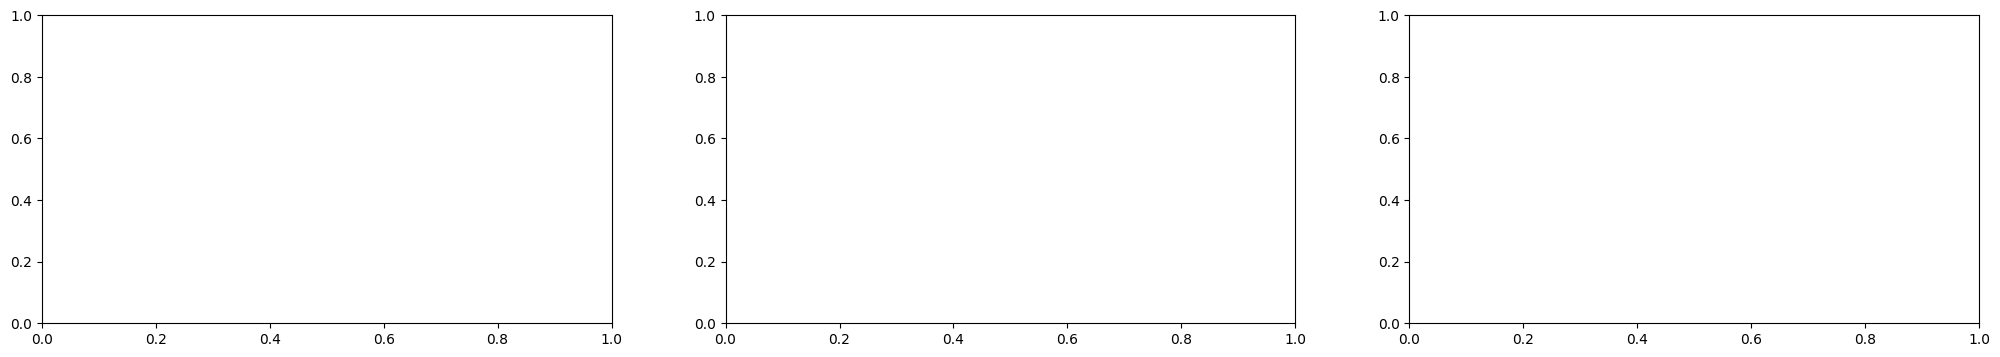

In [4]:
for folder in folders_names:
        Class_num=folder[-1]
        for file in files_names:
            path = os.path.join(folder, file)
            x=0
            fig, axes = plt.subplots(1,3, figsize=(25, 4))  
            for img in os.listdir(path):
                
                
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                axes[x].imshow(img_array, cmap='gray')
                x += 1
                if x == 3: 
                    break

            plt.suptitle(f"Class{Class_num} , {file}", fontsize=26)
            plt.show()

### 📍📍loading 

In [7]:

    
def create_training_data():
    for Class_num, category in enumerate(CATEGORIES):
        category_path = os.path.join(DATADIR, category)
        for folder in os.listdir(category_path):
            path = os.path.join(category_path, folder)
            if not os.path.exists(path):
                print("Folder missing:", path)
                continue
            print("Processing:", path)
            for img in tqdm(os.listdir(path)):
                try:
                    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                    if img_array is not None:
                        training_data.append([img_array, Class_num])
                except Exception as e:
                    print("Error:", e)
       

# 📌Sizes of images

### 📍📍 printing the shape of the first image from each class

In [13]:
import os
import cv2
from tqdm import tqdm

DATADIR = "/kaggle/input/leapgestrecog/leapGestRecog"
CATEGORIES = ["00", "01", "02", "03", "04", "05", "06", "07", "08", "09"]
training_data = []

def create_training_data():
    for class_num, category in enumerate(CATEGORIES):
        category_path = os.path.join(DATADIR, category)
        if not os.path.exists(category_path):
            print("❌ Missing category folder:", category_path)
            continue

        for folder in os.listdir(category_path):
            folder_path = os.path.join(category_path, folder)
            if not os.path.exists(folder_path):
                print("❌ Missing subfolder:", folder_path)
                continue

            for img in tqdm(os.listdir(folder_path), desc=f"Loading {folder_path}"):
                img_path = os.path.join(folder_path, img)
                try:
                    img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    if img_array is not None:
                        training_data.append([img_array, class_num])
                    else:
                        print("⚠️ Could not read:", img_path)
                except Exception as e:
                    print("❌ Error loading image:", img_path, "|", e)

create_training_data()


        
                   


Loading /kaggle/input/leapgestrecog/leapGestRecog/00/02_l: 100%|██████████| 200/200 [00:08<00:00, 24.47it/s]
Loading /kaggle/input/leapgestrecog/leapGestRecog/00/04_fist_moved: 100%|██████████| 200/200 [00:07<00:00, 25.92it/s]
Loading /kaggle/input/leapgestrecog/leapGestRecog/00/09_c: 100%|██████████| 200/200 [00:08<00:00, 24.93it/s]
Loading /kaggle/input/leapgestrecog/leapGestRecog/00/10_down: 100%|██████████| 200/200 [00:07<00:00, 25.56it/s]
Loading /kaggle/input/leapgestrecog/leapGestRecog/00/06_index: 100%|██████████| 200/200 [00:07<00:00, 26.27it/s]
Loading /kaggle/input/leapgestrecog/leapGestRecog/00/08_palm_moved: 100%|██████████| 200/200 [00:07<00:00, 27.25it/s]
Loading /kaggle/input/leapgestrecog/leapGestRecog/00/07_ok: 100%|██████████| 200/200 [00:08<00:00, 22.83it/s]
Loading /kaggle/input/leapgestrecog/leapGestRecog/00/05_thumb: 100%|██████████| 200/200 [00:10<00:00, 18.53it/s]
Loading /kaggle/input/leapgestrecog/leapGestRecog/00/01_palm: 100%|██████████| 200/200 [00:10<00:0

### 📍📍 Checking if all images have the same size or not

In [15]:
import os
import cv2

def check_image_sizes():
    folder = "/kaggle/input/leapgestrecog/leapGestRecog/00"
    files_names = os.listdir(folder)
    first_img_shape = None

    for file in files_names:
        path = os.path.join(folder, file)

        if not os.path.exists(path):
            print("❌ Path not found:", path)
            continue

        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            if img_array is not None:
                if first_img_shape is None:
                    first_img_shape = img_array.shape
                elif img_array.shape != first_img_shape:
                    print("❌ Found different size:", img_array.shape, "at", os.path.join(path, img))
                    return False

    print("✅ All images have the same size:", first_img_shape)
    return True

check_image_sizes()


✅ All images have the same size: (240, 640)


True

# 📌Shuffling

### 📍📍getting the classes of the first 5 images

In [16]:
for i in range(5):
    print("Class number for image", i+1, ":", training_data[i][1])

Class number for image 1 : 0
Class number for image 2 : 0
Class number for image 3 : 0
Class number for image 4 : 0
Class number for image 5 : 0


### 📍📍getting the classes of the lastt 5 images

In [17]:
for i in range(-1, -6, -1):
    print("Class number for image", len(training_data) + i + 1, ":", training_data[i][1])

Class number for image 20000 : 9
Class number for image 19999 : 9
Class number for image 19998 : 9
Class number for image 19997 : 9
Class number for image 19996 : 9


### 📍📍Suffling and display the first 10 classes after suffling

In [18]:
random.shuffle(training_data)

for i in range(15):
    print(f"Sample {i+1}:")
    print("Class number:", training_data[i][1],"\n") 

Sample 1:
Class number: 1 

Sample 2:
Class number: 2 

Sample 3:
Class number: 6 

Sample 4:
Class number: 0 

Sample 5:
Class number: 7 

Sample 6:
Class number: 9 

Sample 7:
Class number: 0 

Sample 8:
Class number: 3 

Sample 9:
Class number: 2 

Sample 10:
Class number: 7 

Sample 11:
Class number: 3 

Sample 12:
Class number: 1 

Sample 13:
Class number: 0 

Sample 14:
Class number: 6 

Sample 15:
Class number: 9 



# 📌Preprocessing

### 📍📍Feature Selection

In [19]:
X=[]
y=[]

for feature,label in training_data:
    X.append(feature)
    y.append(label)


In [20]:
print(type(X))
print(type(y))


<class 'list'>
<class 'list'>


### 📍📍Convert X ,y from list to numpy array

In [21]:
X=np.array(X)
y=np.array(y)
print(X.shape)
print(y.shape)

(20000, 240, 640)
(20000,)


### 📍📍Spliting the Data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16000, 240, 640)
(16000,)
(4000, 240, 640)
(4000,)


### 📍📍Getting classes names

In [23]:
print(np.unique(y_train))

print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


### 📍📍Scalling the Data

In [24]:
X_train = X_train/255
X_test = X_test/255

### 📍📍print first image after scalling 

In [25]:
print(X_train[0])

[[0.02352941 0.01960784 0.02352941 ... 0.02352941 0.01176471 0.01960784]
 [0.02745098 0.02352941 0.02352941 ... 0.01960784 0.01960784 0.01568627]
 [0.02745098 0.02352941 0.01960784 ... 0.01960784 0.01568627 0.01568627]
 ...
 [0.01960784 0.01176471 0.01960784 ... 0.01960784 0.01568627 0.01960784]
 [0.02352941 0.01960784 0.01960784 ... 0.02352941 0.02745098 0.01960784]
 [0.01960784 0.01960784 0.02352941 ... 0.09803922 0.04705882 0.0627451 ]]


# 📌Modeling Time

### 📍📍Building Multi Neural Network

In [4]:

from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU

# Example model
model = Sequential([
    Input(shape=(64, 64, 1)),  # Use your actual input shape
    
    Conv2D(32, (3, 3), padding='same'),
    LeakyReLU(negative_slope=0.1),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), padding='same'),
    LeakyReLU(negative_slope=0.1),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128),
    LeakyReLU(negative_slope=0.1),
    Dropout(0.5),

    Dense(10, activation='softmax')  # Adjust output units as per your classes
])


2025-04-07 20:16:40.553424: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-07 20:16:40.553718: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-07 20:16:40.715464: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### 📍📍Compiling the model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()

# Example: input shape for 28x28 grayscale images (you can adjust based on your data)
input_shape = (28, 28, 1)

# Add layers
model.add(Dense(64, activation='relu', input_shape=input_shape))  # Input layer
model.add(Dense(10, activation='softmax'))  # Output layer (for 10 classes)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


### 📍📍Training the Neural Network

In [23]:

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the MNIST dataset (28x28 grayscale images, 10 classes)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data: Flatten images from (28, 28) to (784,)
X_train = X_train.reshape(-1, 28 * 28).astype('float32')  # Flatten images
X_test = X_test.reshape(-1, 28 * 28).astype('float32')    # Flatten images

# Normalize the pixel values to the range [0, 1]
X_train /= 255.0
X_test /= 255.0

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(28 * 28,)))  # Flattened input shape
model.add(Dense(10, activation='softmax'))  # Output layer (10 classes)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=3, validation_split=0.1, batch_size=32, verbose=2)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/3
1688/1688 - 4s - 2ms/step - accuracy: 0.9114 - loss: 0.3138 - val_accuracy: 0.9607 - val_loss: 0.1475
Epoch 2/3
1688/1688 - 3s - 2ms/step - accuracy: 0.9545 - loss: 0.1550 - val_accuracy: 0.9665 - val_loss: 0.1199
Epoch 3/3
1688/1688 - 3s - 2ms/step - accuracy: 0.9659 - loss: 0.1136 - val_accuracy: 0.9708 - val_loss: 0.1008


### 📍📍 Model Summary

In [25]:
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 152,672 (596.38 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,782 (397.59 KB)

# 📌Evaluation time

### 📍📍Training Loss

In [26]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Training Loss: {loss:.4f}")
print(f"Training Accuracy: {accuracy*100:.2f}%")


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9743 - loss: 0.0896
Training Loss: 0.0930
Training Accuracy: 97.27%


### 📍📍Testing Loss

In [27]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Testing Loss: {loss:.4f}")
print(f"Testing Loss : {accuracy*100:.2f} %")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9595 - loss: 0.1342
Testing Loss: 0.1143
Testing Loss : 96.63 %


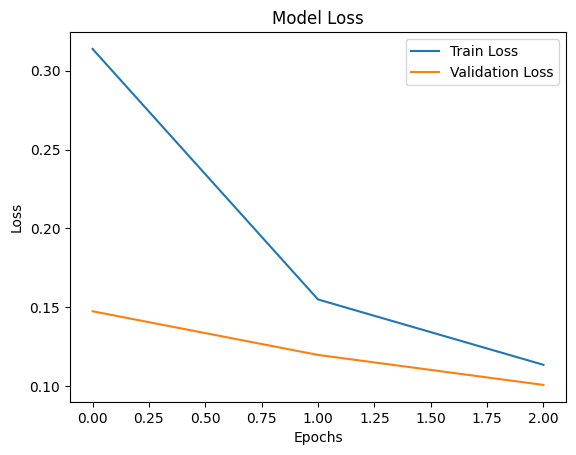

In [29]:
import matplotlib.pyplot as plt  # Add this import

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Validation Loss'])
plt.show()


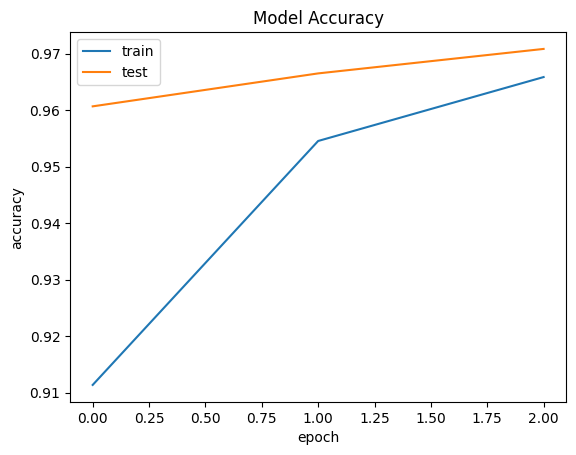

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 📍📍Prediction

In [31]:
y_pred=model.predict(X_test)
print(y_pred[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[8.7873705e-06 4.3484398e-09 2.6440430e-05 1.2192630e-03 6.6801326e-10
 1.5597370e-05 2.0523716e-11 9.9871880e-01 9.9858153e-07 1.0100986e-05]


In [33]:
import numpy as np  # Add this import

# Now you can use np.argmax()
y_pred = [np.argmax(i) for i in y_pred]
print(y_pred[1])


2


### 📍📍y_test Vs y_pred

In [35]:
import pandas as pd  # Add this import

# Now you can create the DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the first 20 rows of the comparison DataFrame
print(comparison_df[:20])


    Actual  Predicted
0        7          7
1        2          2
2        1          1
3        0          0
4        4          4
5        1          1
6        4          4
7        9          9
8        5          6
9        9          9
10       0          0
11       6          6
12       9          9
13       0          0
14       1          1
15       5          5
16       9          9
17       7          7
18       3          3
19       4          4


### 📍📍 Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix  # Add this import

# Now you can use confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)


[[ 974    0    0    1    1    1    1    1    1    0]
 [   0 1127    5    0    0    1    2    0    0    0]
 [   8    6 1002    3    0    1    1    8    2    1]
 [   2    3   14  955    0   13    0    7    6   10]
 [   4    0    7    0  942    0    3    2    2   22]
 [   5    2    0    9    2  863    5    2    0    4]
 [   9    3    1    0    3   12  927    1    1    1]
 [   1    6    9    2    0    0    0 1000    0   10]
 [  14    1    6   14    8    6    4    8  901   12]
 [   6    5    0    7   10    3    0    6    0  972]]


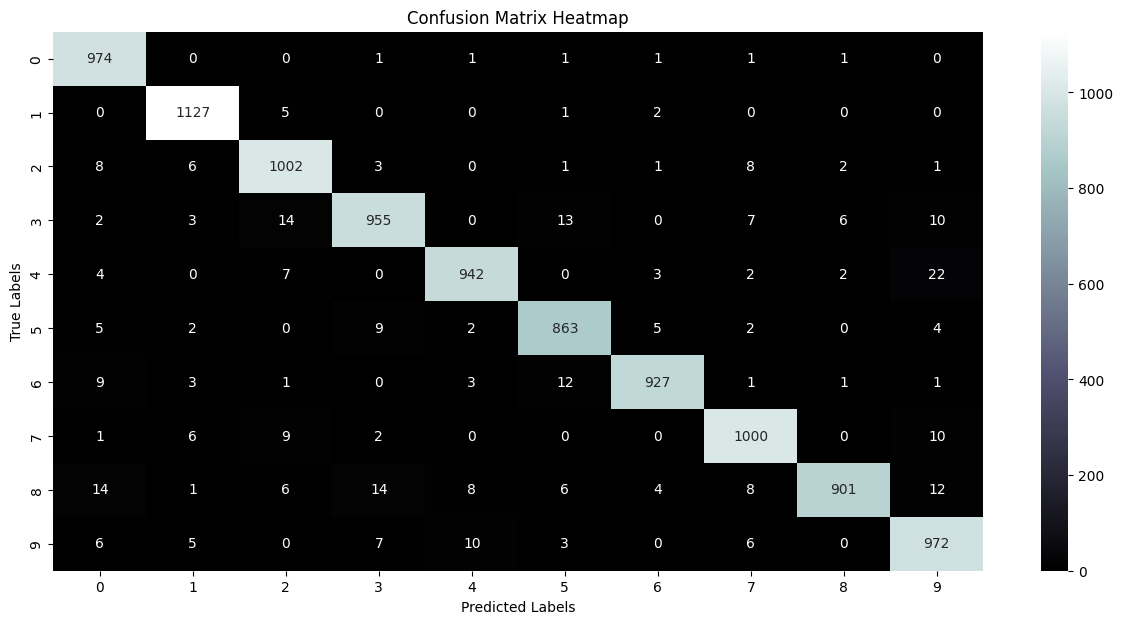

In [39]:
import seaborn as sns  # Add this import
import matplotlib.pyplot as plt  # Make sure to also import matplotlib if not already done

# Now you can create the heatmap
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='bone')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


### 📍📍 Classification Report 

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.95      0.95      1010
           4       0.98      0.96      0.97       982
           5       0.96      0.97      0.96       892
           6       0.98      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.99      0.93      0.95       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

